In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# aim - see if you can predict career length (in years) based off position, height, and weight 

In [3]:
data = pd.read_csv('player_data.csv')

In [4]:
data
# exploration time

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
...,...,...,...,...,...,...,...,...
4545,Ante Zizic,2018,2018,F-C,6-11,250.0,"January 4, 1997",NaN
4546,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University
4547,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne University
4548,Ivica Zubac,2017,2018,C,7-1,265.0,"March 18, 1997",NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4550 non-null   object 
 1   year_start  4550 non-null   int64  
 2   year_end    4550 non-null   int64  
 3   position    4549 non-null   object 
 4   height      4549 non-null   object 
 5   weight      4544 non-null   float64
 6   birth_date  4519 non-null   object 
 7   college     4248 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


In [6]:
# gonna drop all the rows w null values
# then drop name, birth date, and college since who cares + college would be long to engineer a feature for
# then create a feature 'career_length' using end year - start year (REMEMBER delete the rows where the final year is 2018)

In [7]:
data.dropna(inplace=True)
# drops the rows w null values since there was only about 40 of them
# inplace=True will assign it to the og variable

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4213 non-null   object 
 1   year_start  4213 non-null   int64  
 2   year_end    4213 non-null   int64  
 3   position    4213 non-null   object 
 4   height      4213 non-null   object 
 5   weight      4213 non-null   float64
 6   birth_date  4213 non-null   object 
 7   college     4213 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 296.2+ KB


In [9]:
# dropping birth date and college (names will be dealt with later)
data.drop(columns=['college','birth_date'], inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 0 to 4549
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4213 non-null   object 
 1   year_start  4213 non-null   int64  
 2   year_end    4213 non-null   int64  
 3   position    4213 non-null   object 
 4   height      4213 non-null   object 
 5   weight      4213 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 230.4+ KB


In [11]:
# dropping rows where careers ended in 2018
data = data[data.year_end != 2018]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3824 entries, 0 to 4549
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        3824 non-null   object 
 1   year_start  3824 non-null   int64  
 2   year_end    3824 non-null   int64  
 3   position    3824 non-null   object 
 4   height      3824 non-null   object 
 5   weight      3824 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 209.1+ KB


In [13]:
# making a career_length variable
pd.options.mode.chained_assignment = None

In [14]:
data['career_length'] = data['year_end']-data['year_start']
# dropping year_start, year_end
data.drop(columns=['year_end', 'year_start'], inplace=True)

In [15]:
data.head()

,name,position,height,weight,career_length
0,Alaa Abdelnaby,F-C,6-10,240.0,4
1,Zaid Abdul-Aziz,C-F,6-9,235.0,9
2,Kareem Abdul-Jabbar,C,7-2,225.0,19
3,Mahmoud Abdul-Rauf,G,6-1,162.0,10
4,Tariq Abdul-Wahad,F,6-6,223.0,5


In [16]:
# converting height to height in cm
raw_height_full = data['height'].str.split()
raw_height_full
def convert(original_height):
    height_split = original_height.split('-')
    height_converted = (30.48*int(height_split[0])) + (2.54*int(height_split[1]))
    return height_converted

In [17]:
data['height_in_cm'] = data['height'].apply(convert)

In [18]:
# dropping height
data.drop(columns=['height'], inplace=True)
data.head()

,name,position,weight,career_length,height_in_cm
0,Alaa Abdelnaby,F-C,240.0,4,208.28
1,Zaid Abdul-Aziz,C-F,235.0,9,205.74
2,Kareem Abdul-Jabbar,C,225.0,19,218.44
3,Mahmoud Abdul-Rauf,G,162.0,10,185.42
4,Tariq Abdul-Wahad,F,223.0,5,198.12


In [19]:
data.position.value_counts()

G      1338
F      1094
C       386
F-C     330
G-F     305
F-G     190
C-F     181
Name: position, dtype: int64

In [20]:
# making position numeric
data = data.join(pd.get_dummies(data.position))

In [21]:
data.head()

,name,position,weight,career_length,height_in_cm,C,C-F,F,F-C,F-G,G,G-F
0,Alaa Abdelnaby,F-C,240.0,4,208.28,0,0,0,1,0,0,0
1,Zaid Abdul-Aziz,C-F,235.0,9,205.74,0,1,0,0,0,0,0
2,Kareem Abdul-Jabbar,C,225.0,19,218.44,1,0,0,0,0,0,0
3,Mahmoud Abdul-Rauf,G,162.0,10,185.42,0,0,0,0,0,1,0
4,Tariq Abdul-Wahad,F,223.0,5,198.12,0,0,1,0,0,0,0


In [22]:
# dropping name and position
data.drop(columns=['name','position'], inplace=True)

In [23]:
data.head()

,weight,career_length,height_in_cm,C,C-F,F,F-C,F-G,G,G-F
0,240.0,4,208.28,0,0,0,1,0,0,0
1,235.0,9,205.74,0,1,0,0,0,0,0
2,225.0,19,218.44,1,0,0,0,0,0,0
3,162.0,10,185.42,0,0,0,0,0,1,0
4,223.0,5,198.12,0,0,1,0,0,0,0


In [24]:
data.career_length.value_counts()

0     1134
1      463
2      323
3      263
4      202
5      180
9      177
7      162
6      157
10     151
8      142
11     125
12     115
13      87
14      51
15      31
16      27
17      17
18      13
19       2
20       1
22       1
Name: career_length, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

# making a set of predictors (x) and a predictand (y)
x = data.drop(['career_length'], axis = 1)
y = data['career_length']
y

0        4
1        9
2       19
3       10
4        5
        ..
4542     0
4543     0
4546     0
4547     0
4549     0
Name: career_length, Length: 3824, dtype: int64

In [26]:
x

,weight,height_in_cm,C,C-F,F,F-C,F-G,G,G-F
0,240.0,208.28,0,0,0,1,0,0,0
1,235.0,205.74,0,1,0,0,0,0,0
2,225.0,218.44,1,0,0,0,0,0,0
3,162.0,185.42,0,0,0,0,0,1,0
4,223.0,198.12,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4542,195.0,190.50,0,0,0,0,0,1,0
4543,240.0,213.36,1,0,0,0,0,0,0
4546,240.0,215.90,1,0,0,0,0,0,0
4547,170.0,185.42,0,0,0,0,0,1,0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [28]:
train_data = X_train.join(y_train)

In [29]:
train_data.hist(figsize = (15,8))

array([[<AxesSubplot: title={'center': 'weight'}>,
        <AxesSubplot: title={'center': 'height_in_cm'}>,
        <AxesSubplot: title={'center': 'C'}>],
       [<AxesSubplot: title={'center': 'C-F'}>,
        <AxesSubplot: title={'center': 'F'}>,
        <AxesSubplot: title={'center': 'F-C'}>],
       [<AxesSubplot: title={'center': 'F-G'}>,
        <AxesSubplot: title={'center': 'G'}>,
        <AxesSubplot: title={'center': 'G-F'}>],
       [<AxesSubplot: title={'center': 'career_length'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

Error in callback <function flush_figures at 0x129614040> (for post_execute):


KeyboardInterrupt: 

In [30]:
train_data.corr()

,weight,height_in_cm,C,C-F,F,F-C,F-G,G,G-F,career_length
weight,1.000000,0.820636,0.446172,0.172760,0.258480,0.179384,-0.045976,-0.604941,-0.135839,0.124220
height_in_cm,0.820636,1.000000,0.484155,0.222130,0.251312,0.224379,-0.035578,-0.684481,-0.119048,0.162679
C,0.446172,0.484155,1.000000,-0.072216,-0.206841,-0.102045,-0.075102,-0.241447,-0.096792,0.001503
C-F,0.172760,0.222130,-0.072216,1.000000,-0.139431,-0.068788,-0.050626,-0.162758,-0.065247,0.108604
F,0.258480,0.251312,-0.206841,-0.139431,1.000000,-0.197025,-0.145004,-0.466175,-0.186881,-0.151795
F-C,0.179384,0.224379,-0.102045,-0.068788,-0.197025,1.000000,-0.071538,-0.229988,-0.092198,0.153336
F-G,-0.045976,-0.035578,-0.075102,-0.050626,-0.145004,-0.071538,1.000000,-0.169264,-0.067855,0.083982
G,-0.604941,-0.684481,-0.241447,-0.162758,-0.466175,-0.229988,-0.169264,1.000000,-0.218147,-0.070014
G-F,-0.135839,-0.119048,-0.096792,-0.065247,-0.186881,-0.092198,-0.067855,-0.218147,1.000000,0.061876
career_length,0.124220,0.162679,0.001503,0.108604,-0.151795,0.153336,0.083982,-0.070014,0.061876,1.000000


<AxesSubplot: >

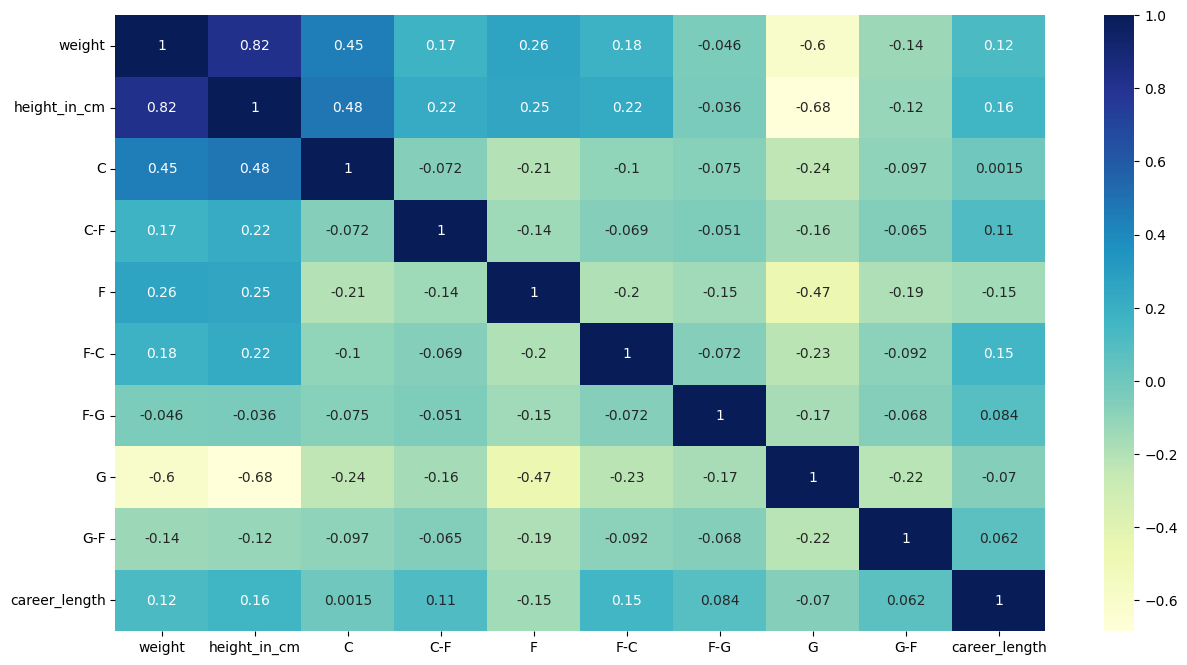

In [31]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

In [32]:
train_data['weight']=np.log(train_data['weight']+1)
train_data['height_in_cm']=np.log(train_data['height_in_cm']+1)
# making the distribution more normal using logarithms (np.log())

array([[<AxesSubplot: title={'center': 'weight'}>,
        <AxesSubplot: title={'center': 'height_in_cm'}>,
        <AxesSubplot: title={'center': 'C'}>],
       [<AxesSubplot: title={'center': 'C-F'}>,
        <AxesSubplot: title={'center': 'F'}>,
        <AxesSubplot: title={'center': 'F-C'}>],
       [<AxesSubplot: title={'center': 'F-G'}>,
        <AxesSubplot: title={'center': 'G'}>,
        <AxesSubplot: title={'center': 'G-F'}>],
       [<AxesSubplot: title={'center': 'career_length'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

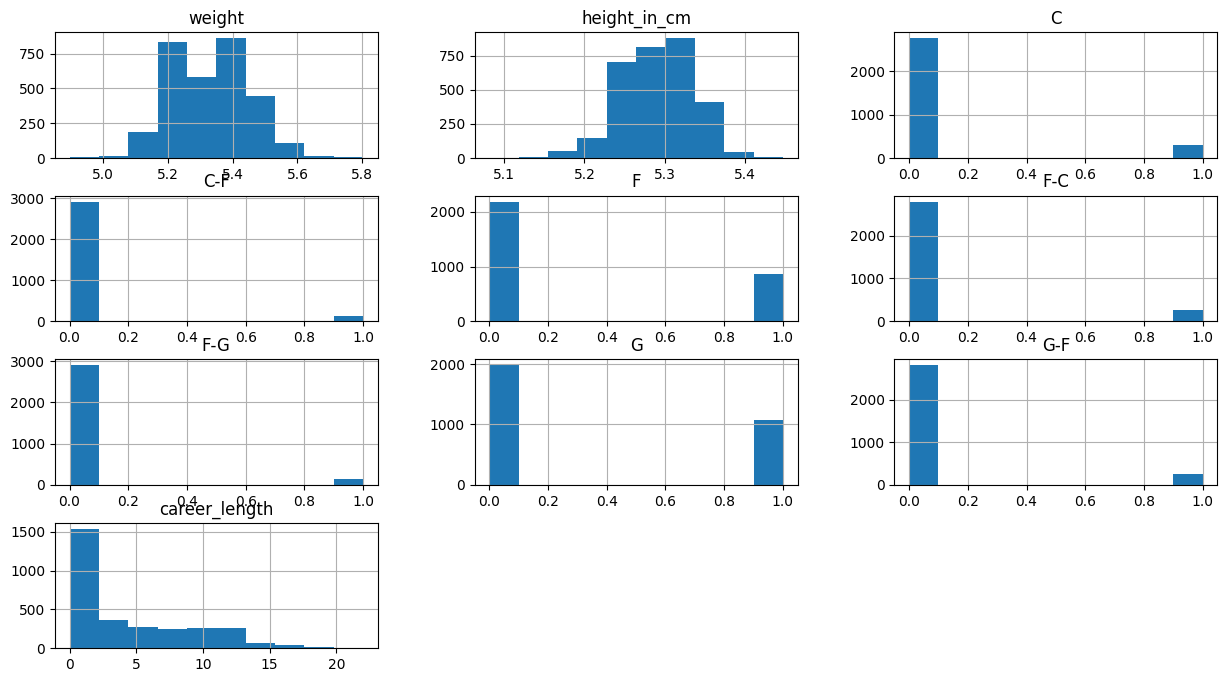

In [33]:
train_data.hist(figsize = (15,8))

<AxesSubplot: >

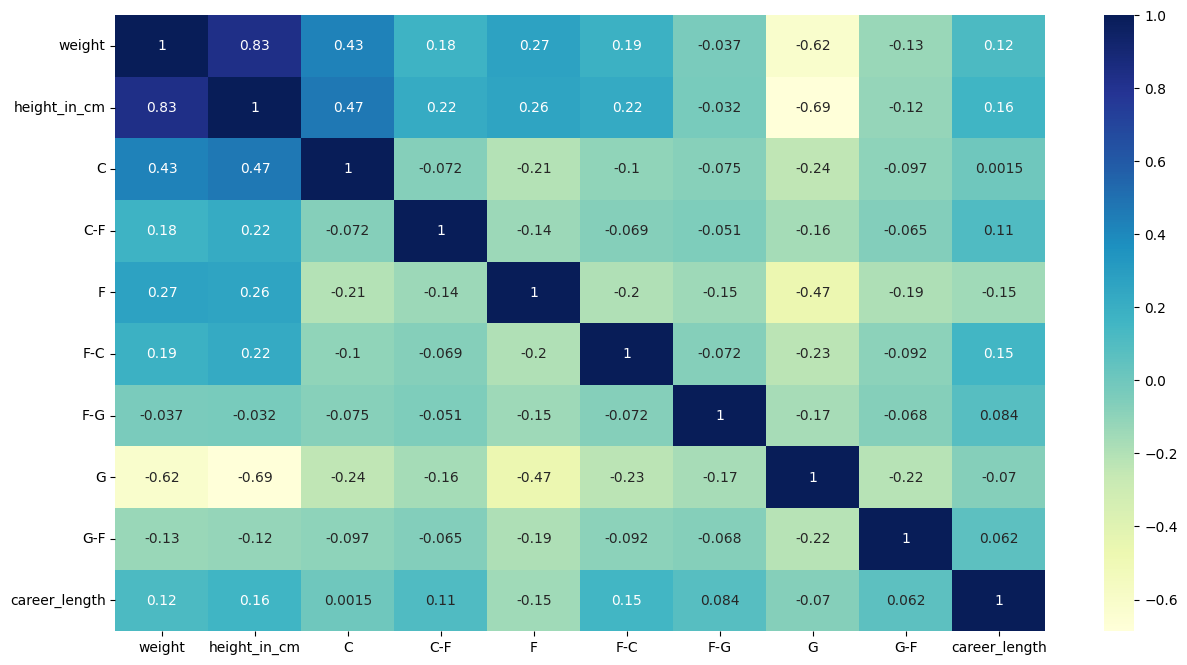

In [34]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

<AxesSubplot: xlabel='height_in_cm', ylabel='weight'>

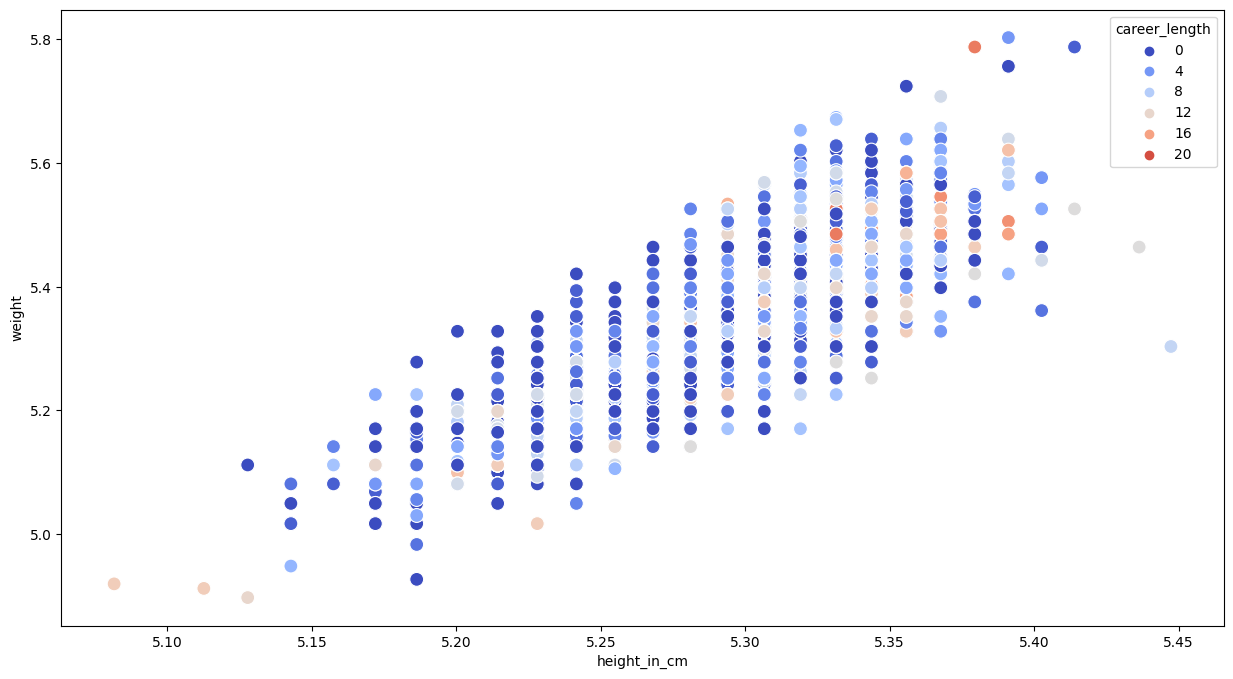

In [35]:
plt.figure(figsize = (15,8))
sns.scatterplot(x='height_in_cm', y = 'weight', data=train_data, hue = 'career_length', palette = 'coolwarm', s=100)

In [36]:
# simple linear regression model

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['career_length'], axis = 1), train_data['career_length']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [40]:
# fixing test data
test_data = X_test.join(y_test)

test_data['weight']=np.log(test_data['weight']+1)
test_data['height_in_cm']=np.log(test_data['height_in_cm']+1)

X_test, y_test = test_data.drop(['career_length'], axis = 1), test_data['career_length']

test_data

,weight,height_in_cm,C,C-F,F,F-C,F-G,G,G-F,career_length
3216,5.525453,5.367657,1,0,0,0,0,0,0,0
1597,5.225747,5.293908,0,0,0,0,0,0,1,13
2982,5.398163,5.306583,0,0,1,0,0,0,0,6
2174,5.236442,5.241535,0,0,0,0,0,0,1,6
689,5.225747,5.214283,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1002,5.398163,5.343673,0,1,0,0,0,0,0,12
2927,5.476464,5.306583,0,0,1,0,0,0,0,10
655,5.442418,5.319100,0,0,1,0,0,0,0,0
866,5.351858,5.281069,0,0,0,0,1,0,0,11


In [41]:
X_test_s = scaler.transform(X_test)

In [42]:
reg.score(X_test_s, y_test)

0.10000844345629212

In [43]:
# random forest time

In [44]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [45]:
forest.score(X_test_s, y_test)

-0.037862956329264064

In [46]:
from sklearn.model_selection import GridSearchCV
# cross validation
# hp tuning
forest = RandomForestRegressor()

param_grid = {
    'n_estimators':[100,200,300],
#     'max_features':[8,12,20],
    'min_samples_split':[2,4,6,8],
    'max_depth':[None, 4, 8]
}
# he went mad i got confused
grid_search = GridSearchCV(forest, 
                           param_grid,
                          cv = 5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [47]:
best_forest = grid_search.best_estimator_

In [48]:
best_forest.score(X_test_s, y_test)

0.10121291315234804